# Day High vs Low - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-10-25 09:20:00,1338.4,1338.6,1337.4,1337.7,4128
2024-10-25 09:25:00,1337.7,1338.0,1337.0,1337.7,2796
2024-10-25 09:30:00,1337.7,1338.0,1335.5,1336.2,4931


In [5]:
day_data = data.copy()
day_data = day_data.resample("D").agg({
    'Close': 'last',
    'High': 'max',
    'Low': 'min'
})
day_data.dropna(subset=['Close'], inplace=True)

In [6]:
day_data['prev_day_high'] = day_data['High'].shift(1)
day_data['prev_day_low'] = day_data['Low'].shift(1)

In [7]:
day_data["pivot"] = day_data.apply(lambda r: (r['High'] + r['Low'] + r['Close']) / 3, axis=1)
day_data['pivot'] = day_data['pivot'].shift(1)

In [8]:
day_data.rename(columns={'High': 'Day_High', 'Low': 'Day_Low', 'Close': 'Day_Close'}, inplace=True)

In [9]:
data = data.assign(time_d=pd.PeriodIndex(data.index, freq='1D').to_timestamp())
data = pd.merge(data, day_data, left_on="time_d", right_index=True, how="left")

In [10]:
data

,Open,High,Low,Close,Volume,time_d,Day_Close,Day_High,Day_Low,prev_day_high,prev_day_low,pivot
Date,,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25 09:20:00,1338.4,1338.6,1337.4,1337.7,4128,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333
2024-10-25 09:25:00,1337.7,1338.0,1337.0,1337.7,2796,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333
2024-10-25 09:30:00,1337.7,1338.0,1335.5,1336.2,4931,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333


In [11]:
data['shortable'] = data.apply(lambda row: True if row['Day_High'] - row['Close'] < 3 else False, axis=1)
data['longable'] = data.apply(lambda row: True if row['Close'] - row['Day_Low'] < 3 else False, axis=1)

In [12]:
data

,Open,High,Low,Close,Volume,time_d,Day_Close,Day_High,Day_Low,prev_day_high,prev_day_low,pivot,shortable,longable
Date,,,,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25 09:20:00,1338.4,1338.6,1337.4,1337.7,4128,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333,True,True
2024-10-25 09:25:00,1337.7,1338.0,1337.0,1337.7,2796,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333,True,True
2024-10-25 09:30:00,1337.7,1338.0,1335.5,1336.2,4931,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333,False,True


In [13]:
data["RSI"] = ta.rsi(data["Close"], length=14).round(0)

In [14]:
data["ATR"] = ta.atr(data["High"], data["Low"], data["Close"], window = 14).round(1)

In [15]:
data["time"] = data.apply(lambda r: 100* r.name.hour + r.name.minute, axis=1)

In [16]:
data

,Open,High,Low,Close,Volume,time_d,Day_Close,Day_High,Day_Low,prev_day_high,prev_day_low,pivot,shortable,longable,RSI,ATR,time
Date,,,,,,,,,,,,,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True,NaN,NaN,900
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True,NaN,NaN,905
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True,NaN,NaN,910
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True,NaN,NaN,915
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765,2018-08-13,954.2,954.6,942.3,NaN,NaN,NaN,False,True,NaN,NaN,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25 09:20:00,1338.4,1338.6,1337.4,1337.7,4128,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333,True,True,33.0,1.9,920
2024-10-25 09:25:00,1337.7,1338.0,1337.0,1337.7,2796,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333,True,True,33.0,1.8,925
2024-10-25 09:30:00,1337.7,1338.0,1335.5,1336.2,4931,2024-10-25,1335.8,1339.8,1335.3,1354.1,1336.1,1342.733333,False,True,30.0,1.9,930


In [17]:
# short_data = data[data['shortable'] == True]
# long_data = data[data['longable'] == True]
# rac_data = data[(data['longable'] != True) & (data['shortable'] != True)]

In [18]:
def group_signal(row):
    group = 'Rac'
    if row['longable'] == True:
        group = 'Long'
    elif row['shortable'] == True:
        group = 'Short'
    return group
data['group'] = data.apply(lambda r: group_signal(r), axis=1)

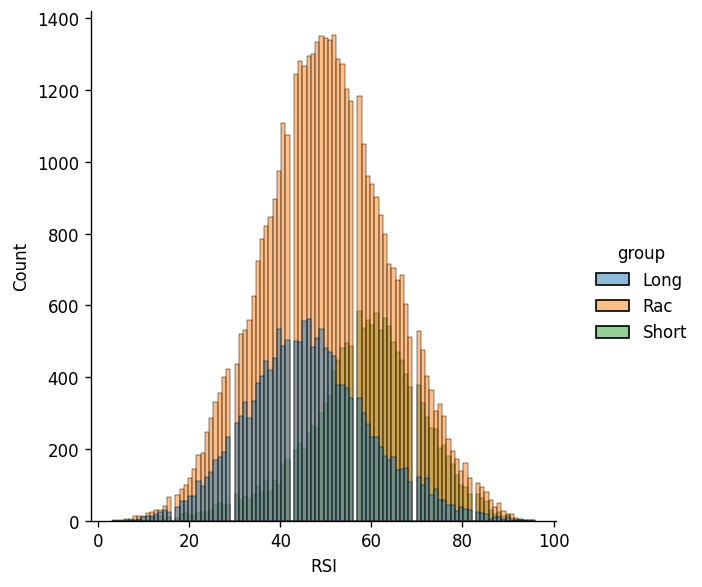

In [19]:
sns.displot(data, x="RSI", hue="group")

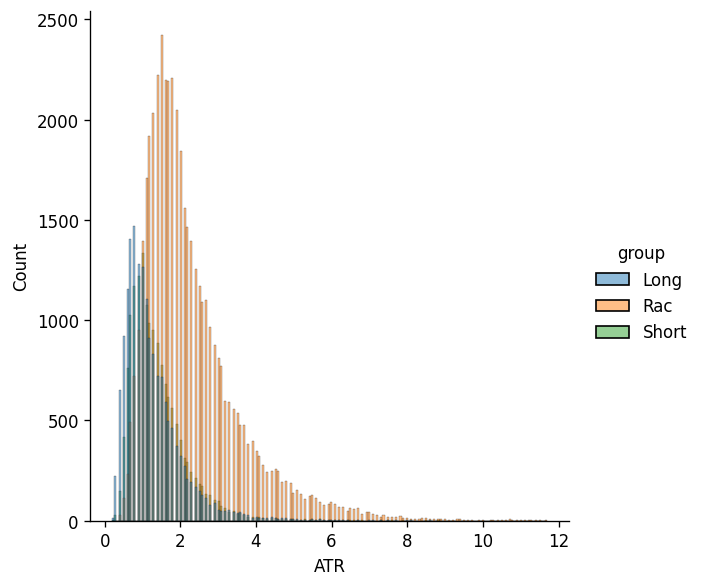

In [20]:
sns.displot(data, x="ATR", hue="group")

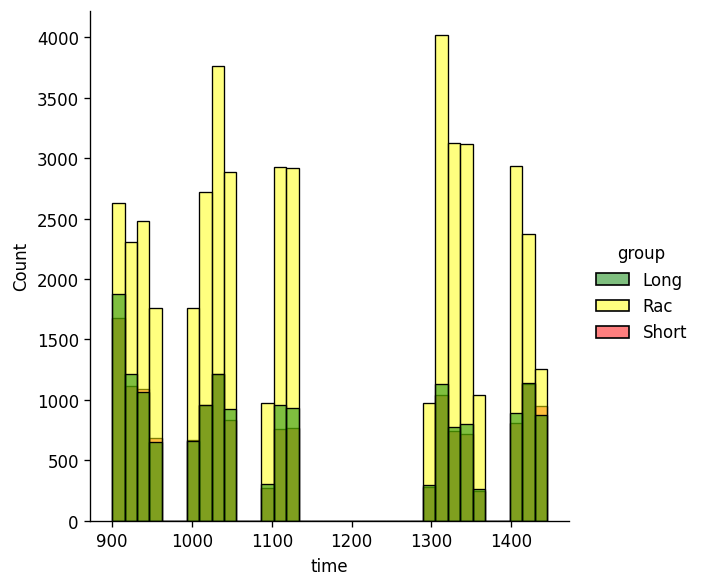

In [30]:
sns.displot(data, x="time", hue="group", palette=dict(Long="green", Rac="yellow", Short="red"))

In [21]:
from sklearn.cluster import KMeans
_4cluster_data = data.copy()
_4cluster_data['input_1'] = _4cluster_data['Close'] - _4cluster_data['High']
_4cluster_data['input_2'] = _4cluster_data['Close'] - _4cluster_data['Low']
_4cluster_data['input_3'] = _4cluster_data['Close'] - _4cluster_data['Open']
_4cluster_data.round({'input_1': 1, 'input_2': 1, 'input_3': 1})
_1st_cluster_cols = ["input_1", "input_2", "input_3"]
_1st_model = KMeans(n_clusters=197, init='k-means++', random_state=43)
_1st_result = _1st_model.fit_predict(_4cluster_data[_1st_cluster_cols])
data = data.assign(single_cluster=_1st_result)

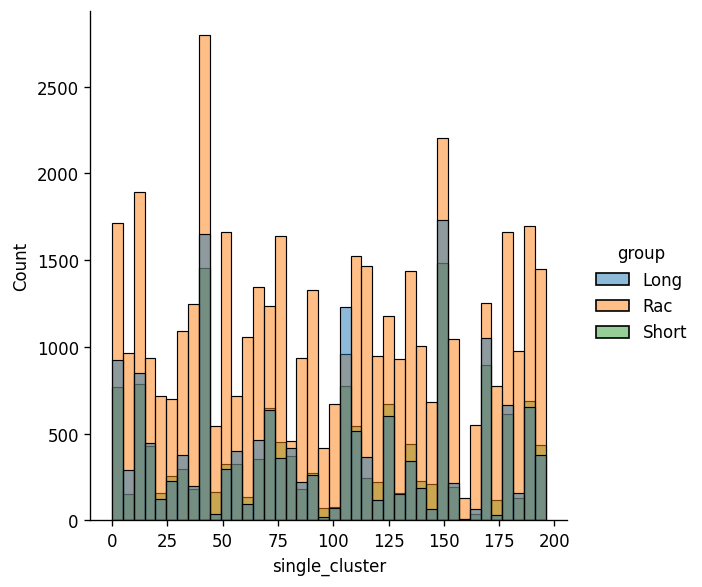

In [22]:
sns.displot(data, x="single_cluster", hue="group")

In [23]:
def cal_high_position(row):
    return (row['High'] - row['prev_day_low']) / (row['prev_day_high'] - row['prev_day_low'])

def cal_low_position(row):
    return (row['Low'] - row['prev_day_low']) / (row['prev_day_high'] - row['prev_day_low'])
data['high_pos'] = data.apply(lambda row: cal_high_position(row), axis=1).round(1)
data['low_pos'] = data.apply(lambda row: cal_low_position(row), axis=1).round(1)

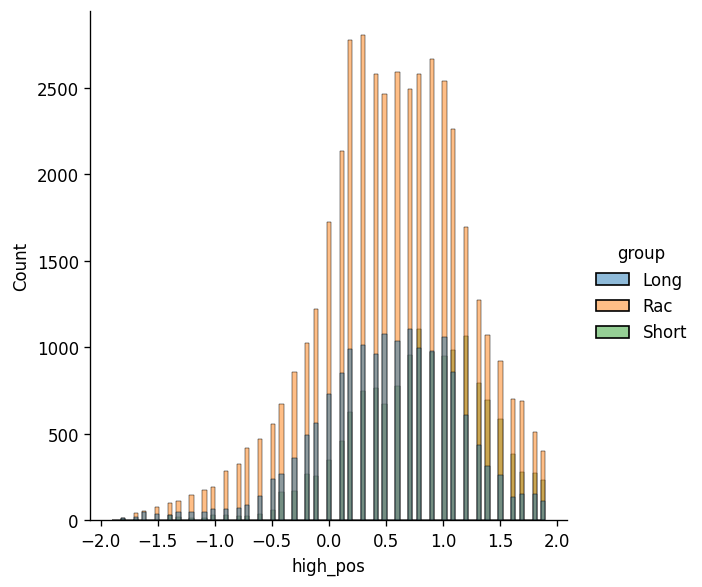

In [24]:
hlp_data = data[(data.high_pos < 2) & (data.high_pos > -2) & (data.low_pos < 2) & (data.low_pos > -2)]
sns.displot(hlp_data, x="high_pos", hue="group")

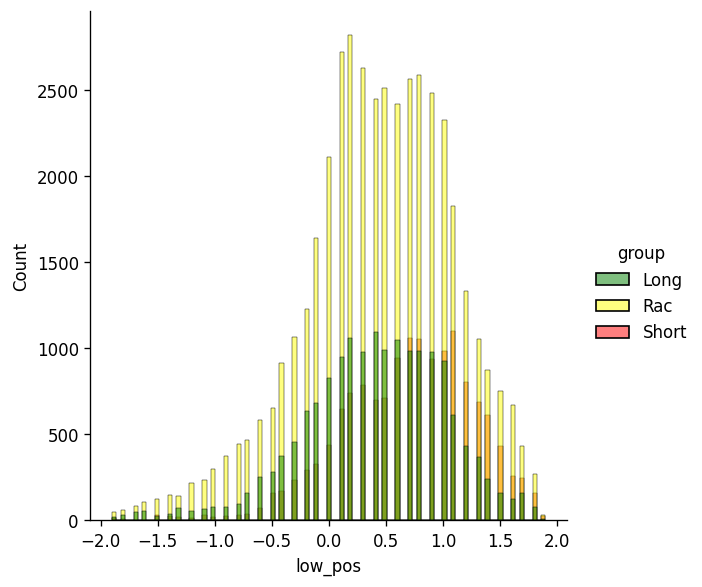

In [25]:
sns.displot(hlp_data, x="low_pos", hue="group", palette=dict(Long="green", Rac="yellow", Short="red"))
hlp_data = None

In [26]:
pivot_data = data.copy()
pivot_data['high_pivot_diff'] = pivot_data.apply(lambda row: 100 * (row['High'] - row['pivot']) / row['pivot'], axis=1).round(1)
pivot_data['low_pivot_diff'] = pivot_data.apply(lambda row: 100 * (row['Low'] - row['pivot']) / row['pivot'], axis=1).round(1)
pivot_data = pivot_data[(pivot_data.high_pivot_diff < 2) & (pivot_data.high_pivot_diff > -2) & (pivot_data.low_pivot_diff < 2) & (pivot_data.low_pivot_diff > -2)]

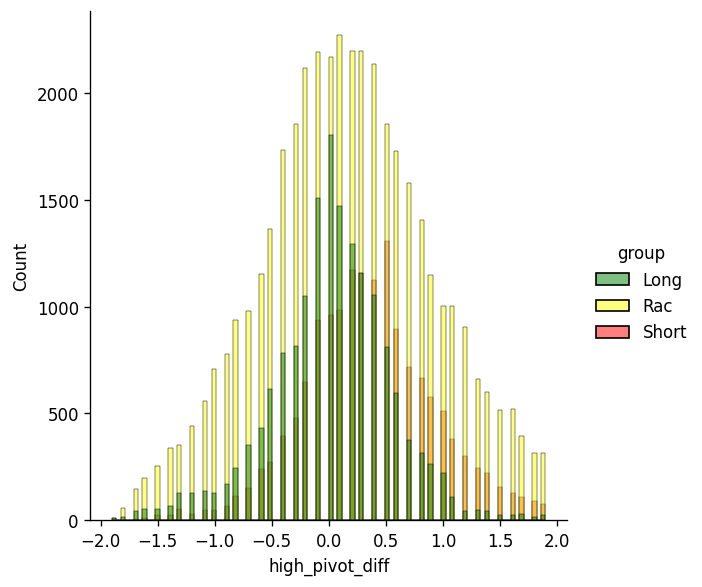

In [27]:
sns.displot(pivot_data, x="high_pivot_diff", hue="group", palette=dict(Long="green", Rac="yellow", Short="red"))

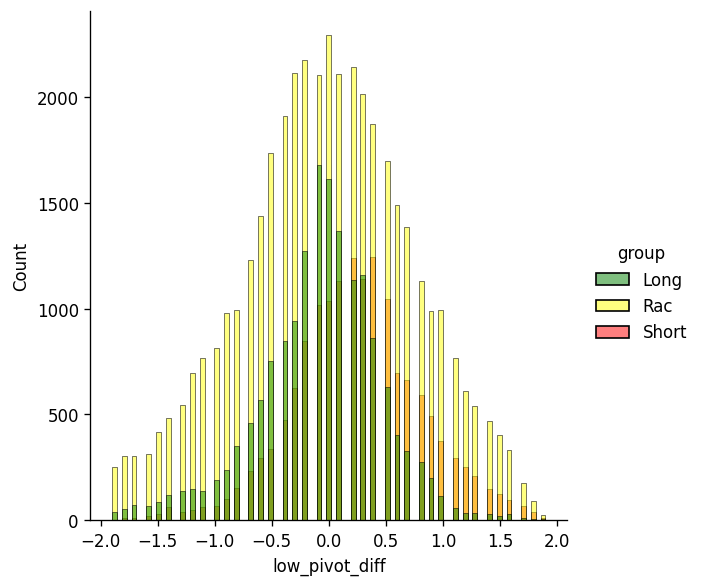

In [28]:
sns.displot(pivot_data, x="low_pivot_diff", hue="group", palette=dict(Long="green", Rac="yellow", Short="red"))
pivot_data = None